### **Euler–Maruyama Method**

The **Euler–Maruyama method** is a numerical technique used to approximate solutions to **stochastic differential equations (SDEs)**. It is an extension of the **Euler method** used for ordinary differential equations (ODEs), modified to handle the stochastic (random) part of SDEs, typically involving **Brownian motion**.

---

### **1. Stochastic Differential Equations (SDEs) Formulation**

A general SDE can be written as:

$$
dX_t = a(X_t, t) \, dt + b(X_t, t) \, dW_t
$$

where:  
- $X_t$ is the stochastic process.  
- $a(X_t, t)$ is the **drift term** (deterministic part).  
- $b(X_t, t)$ is the **diffusion term** (stochastic part).  
- $W_t$ represents a **Wiener process** or **Brownian motion**.

---

### **2. Euler–Maruyama Discretization**

To approximate the solution, the continuous-time SDE is discretized over a time grid $t_0, t_1, ..., t_N$ with a fixed step size $\Delta t = t_{k+1} - t_k$. The **Euler–Maruyama** approximation is given by:

$$
X_{t_{k+1}} = X_{t_k} + a(X_{t_k}, t_k) \Delta t + b(X_{t_k}, t_k) \Delta W_k
$$

where:  
- $\Delta W_k \sim \mathcal{N}(0, \Delta t)$ (normal distribution with mean 0 and variance $\Delta t$).  
- $\Delta W_k$ models the **random increment** of Brownian motion.

---

### **3. Interpretation of Terms:**
- **Drift Term:** $a(X_{t_k}, t_k) \Delta t$ represents the **deterministic** change over time $\Delta t$, similar to the Euler method for ODEs.
- **Diffusion Term:** $b(X_{t_k}, t_k) \Delta W_k$ captures the **random fluctuations** in the process, accounting for stochastic behavior.

---

### **4. Example: Geometric Brownian Motion (GBM)**

Consider the **GBM** equation:

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

The **Euler–Maruyama discretization** becomes:

$$
S_{t_{k+1}} = S_{t_k} + \mu S_{t_k} \Delta t + \sigma S_{t_k} \Delta W_k
$$

where $\Delta W_k = \sqrt{\Delta t} Z_k$ and $Z_k \sim \mathcal{N}(0, 1)$.

---

### **5. Python Implementation of Euler–Maruyama Method (GBM Example)**

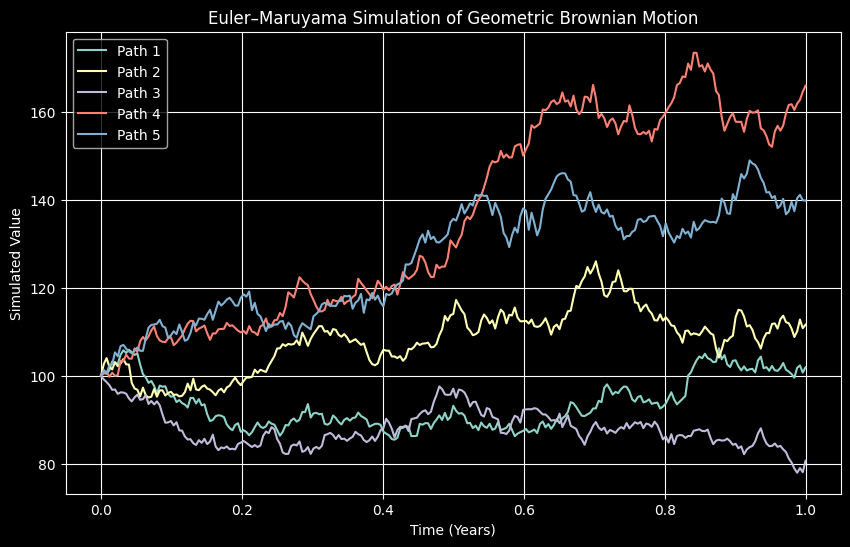

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100  # Initial value
mu = 0.05  # Drift coefficient
sigma = 0.2  # Volatility
T = 1.0  # Total time (1 year)
N = 252  # Number of time steps
dt = T / N  # Time step size
simulations = 5  # Number of simulations

# Time vector
time_grid = np.linspace(0, T, N + 1)

# Initialize array for simulations
S = np.zeros((simulations, N + 1))
S[:, 0] = S0

# Euler–Maruyama simulation
np.random.seed(42)
for i in range(simulations):
    for t in range(1, N + 1):
        Z = np.random.normal(0, 1)
        dW = np.sqrt(dt) * Z
        S[i, t] = S[i, t - 1] + mu * S[i, t - 1] * dt + sigma * S[i, t - 1] * dW

# Plot results
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(time_grid, S[i], label=f"Path {i + 1}")
plt.title("Euler–Maruyama Simulation of Geometric Brownian Motion")
plt.xlabel("Time (Years)")
plt.ylabel("Simulated Value")
plt.legend()
plt.grid(True)
plt.show()

---

### **6. Key Characteristics of Euler–Maruyama Method:**

| Feature                | Description                                  |
|------------------------|----------------------------------------------|
| **Simplicity**         | Straightforward to implement, like Euler's method for ODEs. |
| **Convergence**        | Has **strong order of convergence** $\mathcal{O}(\sqrt{\Delta t})$ and **weak order** $\mathcal{O}(\Delta t)$. |
| **Accuracy**           | Accuracy depends on step size $\Delta t$; smaller $\Delta t$ leads to better approximations. |
| **Stochastic Component**| Incorporates randomness through Brownian increments $\Delta W_k$. |

---

### **7. Advantages and Limitations**

#### **Advantages:**
- Easy to implement.
- Suitable for a broad class of SDEs.
- Computationally efficient for simple SDEs.

#### **Limitations:**
- **Low accuracy** for small time steps compared to higher-order methods.
- **Not suitable** for SDEs requiring higher precision without a significantly smaller time step.
- Sensitive to **step size** and can exhibit instability if $\Delta t$ is too large.

---

### **8. Applications of Euler–Maruyama Method**
- **Financial Mathematics:** Pricing options, simulating stock prices (e.g., GBM).
- **Physics:** Modeling diffusion processes and Langevin dynamics.
- **Biology:** Population dynamics with stochastic birth-death processes.
- **Engineering:** Signal processing and control systems with random noise.

---

### **9. Summary**
The **Euler–Maruyama method** provides a simple yet powerful way to approximate solutions to **stochastic differential equations (SDEs)** by extending the deterministic **Euler method** to include stochastic components. While it may lack the accuracy of more advanced methods, its ease of use and broad applicability make it a fundamental tool in the numerical analysis of stochastic systems.